### Selection Bias Under Multiple Testing

이 절에서는 다음의 수치 예제를 사용해 다중 검정($\text{SBuMT}$)하에서 선택 편향의 위험성을 자세히 살펴본다. 한 연구자가 분석을 마치고 'Promising' Trading Strategy를 매니저에게 보고했다고 가정해 보자. 백테스트는 연율화된 Sharpe Ratio가 약 1이고, 연율화된 실현 변동성이 약 15%임을 보여준다. 백테스트는 지난 5년간의 일일 수익률을 산출물로 제공하므로, 관측치의 수는 $T = 5 \times 252 = 1260$이다.

PM은 이 발견이 통계적으로 얼마나 유의한지 평가하려고 한다. 그들은 Sharpe Ratio의 "참값"이 주어지면, 실현된 Sharpe Ratio는 참값 근처 어딘가에 있을 수 있으며, 정규 분포(Bailey and Lopez de Prado 2012)에 의해 정의된 확률과 다음과 같은 표준 편차가 주어진다.

$$\sigma_{\text{SR}} = \sqrt{\frac{1}{T} \left( 
1 - \gamma_3 \text{SR} + \frac{\gamma_4 - 1}{4} \text{SR}^2
\right)}$$

여기서 $T$는 관측치의 개수, $\gamma_3$는 분포의 왜도, $\gamma_4$는 분포의 첨도를 의미한다(여기서 정규분포의 첨도는 3이다). 이 통찰력을 바탕으로 매니저는 실제 Sharpe Ratio가 실제로 $\text{SR}^* = 0$이라는 귀무 가설에 대해 보고된 값 $y=1$에 대한 표준 통계 검정을 실행한다. 표준 검정을 시행하기 위해서는 다음과 같이 누적 확률을 계산해야 한다.

$$F_Y \left(y \right) = P(\text{SR} \leq y)$$

$\text{SR}$값의 정규 분포와 $\sigma_{\text{SR}}$에 의해 설명된 분포를 가정하면 검정의 p-value는 $p = F_Y \left( y \right) = 0.02$, 연율화 컷오프 값인 $\text{SR}_{\text{cut off}} = 0.74$로 계산된다. 보고된 $\text{SR}$은 컷오프 값보다 훨씬 높고 p-value 값은 0.05 미만이므로 귀무 가설이 이러한 결과를 생성할 가능성은 5% 미만이다. 포트폴리오 매니저는 95% 신뢰하여 귀무 가설을 기각하고 연구자의 보고서를 '새로운 발견'으로 받아들일 수 있다. 그러나, 한 가지 문제점이 발생한다. 포트폴리오 매니저는 이외에도 10가지의 다른 시도가 시도되었으며, 연구원이 그 중 가장 높은 Sharpe Ratio를 가진 시도만 보고했다는 것을 알게 된다. 이것은 $\text{SBuMT}$에 의해 설명되는 전형적인 상황이다.

이해를 위해, 아래의 그림은 10,000회의 시뮬레이션을 실행하여 얻은 histogram이며, 세 가지 시나리오에 대해 실현된 Sharpe Ratio를 보여준다.

1. Blue with expected SR = 0
2. Amber with expected SR = 1
3. Green with expected maximum SR of a sample of 10 trials with expected SR = 0



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

n_samples = 10000
sr_0 = np.random.normal(0, 0.4, n_samples)
sr_1 = np.random.normal(1, 0.4, n_samples)

n_signals = 10
sr_0_signals = np.random.normal(0, 0.4, (n_signals, n_samples))
sr_0_max = sr_0_signals.max(axis = 0)

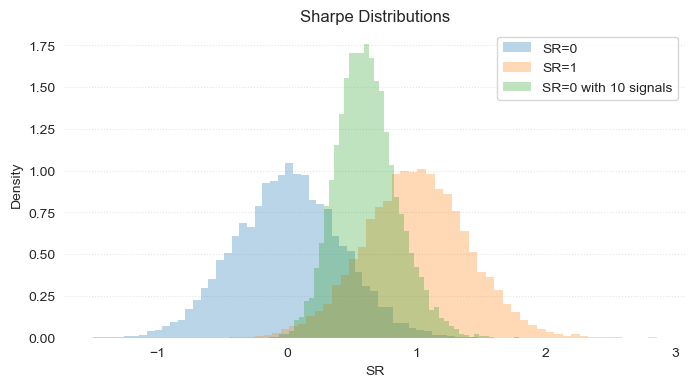

In [2]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.histplot(
    sr_0, 
    label = 'SR=0',
    stat = 'density', 
    bins = 50, 
    alpha = 0.3,
    edgecolor = 'none',
    color = 'tab:blue',
    ax = ax
)
sns.histplot(
    sr_1,  
    label = 'SR=1', 
    stat = 'density', 
    bins = 50, 
    alpha = 0.3,
    edgecolor = 'none',
    color = 'tab:orange',
    ax = ax
)
sns.histplot(
    sr_0_max, 
    label = 'SR=0 with 10 signals', 
    stat = 'density', 
    bins = 50, 
    alpha = 0.3,
    edgecolor = 'none',
    color = 'tab:green',
    ax = ax
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.legend()
plt.xlabel('SR')
plt.ylabel('Density')
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('Sharpe Distributions')
plt.show()

녹색 분포의 평균은 $\text{SR} = 0.7$정도이다. 이는 표준 단일 시행 통계 검정의 컷오프 값에 상당히 가깝다. 즉 실현된 최대 $\text{SR}$의 약 절반이 표준 단일 시행 통계 검정에서 유의한 것으로 간주된다는 것을 의미한다. 이는 평균이 0인 $N$개의 random walk 과정 중에서 명백하게 유의한 전략을 찾는 것이 얼마나 쉬운지를 보여준다. 녹색 분포는 단일 시행 가설 아래의 분포보다 좁으며, 이는 다중 검정 가정 하에서 $\text{SR}$ 유의성을 검정하기 위해 위 식으로로 계산된 $\sigma_{\text{SR}}$을 사용하는 것이 적절하지 않다는 것을 의미한다. 또한 기대되는 최대 $\text{SR}$의 분포가 정규 분포를 벗어나지만 급격하게 벗어나지는 않는다.

포트폴리오 매니저는 이전에 실행된 표준 검정이 충분하지도 않고 적절하지도 않다는 것을 깨닫고 보고된 Sharpe Ratio를 이러한 여러 검정을 고려한 다른 귀무 가설에 대해 검정해야 한다. 새로운 귀무 가설은 보고된 Sharpe Ratio가 zero-mean 랜덤 독립 검정에서 얻은 최대 $K = 10$ 값이라는 것이다. 이 검정에 대한 분포의 누적 분포는 다음과 같다.

$$F_Y \left( y \right) = P(\max(\{ \text{SR}_k\}) \leq y) = P\left((\text{SR}_1 < y), … , (\text{SR}_K < y) \right)$$

이 시점에서 포트폴리오 매니저가 취할 수 있는 접근법은 크게 두 가지이다. 첫 번째 접근법은 유의 수준 $\alpha$를 수정하여 Family-wise error rate($\text{FWER}$)를 추정하는 것이다. 검정군의 Sharpe Ratio가 독립적이라고 가정하면 다음과 같이 쓸 수 있다.

$$F_Y \left( y \right) = P(\max(\{ \text{SR}_k\}) \leq y) = P\left((\text{SR}_1 < y), … , (\text{SR}_K < y) \right) = \prod_{k=1}^K P(\text{SR}_k < y)$$

귀무가설은 $F_Y (y) < 1 - \alpha$일때 기각되며, 이는 곧 다음과 같다.

$$\prod_{k=1}^K P(\text{SR}_k < y) < (1 - \alpha_k)^K$$

Type 1 error의 오차율이 $\alpha = 1 - c$, 즉 귀무가설이 참일 경우 검정에서 귀무가설을 평균적으로 $\alpha N$번 기각할 것을 요구한다. 이 목적을 달성하기 위해서는 각 검정의 오차율 $\alpha k$를 조정해야 한다. 수정 내용은 다음과 같다.

$$1 - \alpha = (1 - \alpha_k)^K$$

이것은 Sidak 조정으로 이어진다 (Sidak, 1967)

$$\alpha_k = 1 - (1 - \alpha)^{\frac{1}{K}}$$

그리고 그것의 더 간단한 근사치인 Bonferroni 조정은(Bonferroni, 1936)

$$\alpha_k = \frac{\alpha}{K}$$

이다. 이러한 조정을 통해 각 전략에 대해 귀무 가설이 올바른 $K$개의 독립 검정 그룹을 검정한 후 귀무 가설을 기각할 확률이 5% 미만이 되는 것을 목표로 한다. Sidak 조정은 포트폴리오 매니저를 최상의 전략에 대해 수행된 단일 검정의 p-value보다 큰 $\alpha_k = 0.0051$의 값으로 이끌며, 컷오프 $\text{SR}$ 값은 보고된 Sharpe ratio 1보다 높은 1.15이다. 이러한 결과는 포트폴리오 매니저가 다중 시행 가정 하에서 귀무 가설을 기각할 수 없음을 의미하며, $\text{SR}$이 통계적으로 유의하지 않다는 결론을 내린다. 자세한 내용은 Lopez de Prado(2020)를 참조하라.

두번째 접근법은 극단치 이론(Extreme Value Theory)에서 보다 정확한 Family Wise Error Rate 제어를 도출하는 것이다. Gaussian $Y = \max \left( X_1, X_2, \dots, X_K \right)$ list의 최대값은 다음과 같은 누적 분포를 갖는다.

$$F_Y (y) = P \left( \max(\{X_k\}) \leq y\right) = \prod_{k=1}^K F_{X_k} (y)$$

여기서 $F_{X_k} (y)$는 $X_k$를 생성하는 프로세스의 누적 분포 함수(CDF)이다. 독립적이고 동일하게 분포된 데이터 집합에서 확률 밀도 함수(PDF)는 다음과 같다.

$$f_Y (y) = \frac{\partial}{\partial y} F_Y (y) = K \phi (y) Z(y)^{K-1}$$

여기서 $\phi(.)$는 표준 정규 분포의 PDF이고, $Z(.)$는 표준 정규 분포의 CDF이다(Embrechts, Küpelberg 및 Mikosch 2013 참조). 이 분포의 첫 두개의 적률은 수치 적분을 사용하여 계산할 수 있다. 정규 분포 $N(\mu, \sigma^2)$에서 $\text{SR}$ 값을 도출했다고 가정하면 다음과 같은 결론을 내릴 수 있다.

$$E[Y] = \eta + \sigma \int_{-\infty}^{\infty} y f_Y(y)dy$$
$$\sigma[Y] = \sigma \sqrt{\int_{-\infty}^{\infty} (y - E[y])^2 f_Y(y)dy}$$

극단치 이론을 적용해, Bailey et al.(2014)는 다음과 같은 False Strategy Theorem을 증명했다.

$$E[Y] \approx \eta + \sigma(1 - \gamma)Z^{-1} \left( 1 - \frac{1}{K}\right) + \sigma \gamma Z^{-1} \left( 1- \frac{1}{K_e} \right)$$

여기서 $K$는 독립 시행 횟수이고, $\gamma$는 오일러-마스케로니 상수로 $\gamma = 0.577215665…$이다. Bailey and Lopez de Prado(2021)는 몬테카를로 실험을 통해 이 근사치의 정확성을 확인했다. 이제 포트폴리오 매니저는 보고된 $\text{SR}$이 10번의 제로 mean 시행 중 최대 $\text{SR}$이라는 가설에 대해 $\text{SR} = 1$의 유의성을 검정한다. 예상되는 최대 $\text{SR}$은 0.69이고 $\text{SR} = 1$에 해당하는 p-value은 0.88이고, 95% 신뢰수준 값은 1.12이다. 따라서 포트폴리오 매니저는 보고된 $\text{SR}$이 유의하지 않다고 결론 내릴 수 있으며, 이는 초기 표준 $\text{SR}$ 유의성 검정의 결과와 모순된다.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm import tqdm

n_days = 1260 
annual_volatility = 0.15
daily_volatility = annual_volatility / np.sqrt(252)
n_trials = 30  

expected_srs = []
percentile95_srs = []

for n_strategies in tqdm(range(1, n_trials + 1)):
    sr_list = []
    for _ in range(10000): 
        returns = np.random.normal(0, daily_volatility, (n_strategies, n_days))
        sr = np.mean(returns, axis=1) / np.std(returns, axis=1) * np.sqrt(252)
        sr_list.append(np.max(sr))
    expected_srs.append(np.mean(sr_list))
    percentile95_srs.append(np.percentile(sr_list, 95))

100%|██████████| 30/30 [01:37<00:00,  3.25s/it]


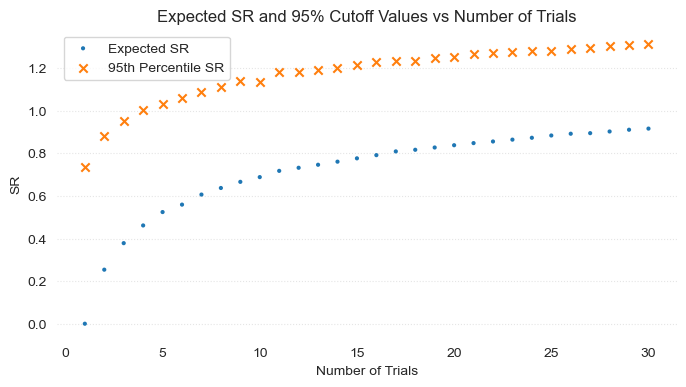

In [4]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.scatter(
    range(1, n_trials + 1), 
    expected_srs, 
    label='Expected SR',
    marker='.',
    edgecolor = 'none'
)
ax.scatter(
    range(1, n_trials + 1), 
    percentile95_srs, 
    label='95th Percentile SR', 
    marker='x',
    edgecolor = 'none'
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.legend()
plt.xlabel('Number of Trials')
plt.ylabel('SR')
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('Expected SR and 95% Cutoff Values vs Number of Trials')
plt.show()

통계 검정에 대한 여러 시행의 효과와 위에서 논의한 다양한 방법론의 성능을 설명하기 위해 10,000개의 시뮬레이션을 실행하여 각 시뮬레이션 단계에서 5년간의 일일 수익률(1,260개의 관측치)을 나타내는 10개의 시계열을 만들었다. 모든 수익률은 평균이 0이고 연간 변동성이 15%인 정규 분포에서 도출되었다. $\text{SR}$은 각 전략에 대해 계산되었으며 가장 좋은 것이 선택되었다. 위 그림는 시뮬레이션(Sim에 의한 $\text{SR}$ 표현)과 수치 통합(Int에 의한 $\text{SR}$ 표현)에 의해 계산된 예상 $\text{SR}$ 값을 보여준다. 또한 시뮬레이션(시뮬레이션에 의한 95번째 분위수), 수치 통합(Int에 의한 95번째 분위수) 및 Sidak 조정 방법(Sidak에 의한 95번째 분위수)의 여러 방법을 사용하여 계산된 SR의 95번째 백분위수를 보여준다. 동일한 그래프에서 수평선은 단일 시행 가설 가정(표준 테스트)에서 귀무가설 분포의 95번째 분위수 값을 나타낸다.

위 그림은 기대수익률이 0인 시계열에서도 여러 번 시행하여 $\text{SR}$ 값을 부풀리는 것이 얼마나 쉬운가를 보여준다. 기대 최대 $\text{SR}$은 단일 시행 가정 하에서 얻은 95번째 분위수를 매우 빠르게 초과한다. 보다시피, 실용적인 목적을 위해 적용된 모든 방법은 매우 유사한 결과를 제공한다.

이 분석에 사용된 Sidak 조정 방법과 Extreme Value 방법은 시행이 독립적인 경우에만 작동할 것으로 예상된다. 실제 상황에서 연구자는 일반적으로 유사한 거래 아이디어에 대해 서로 다른 매개 변수 구성을 시도하여 시행 간 상관 관계가 0이 아니다. 이러한 우려를 해결하기 위해 Lopez de Prado& Lewis(2019)와 Lopez de Prado(2019b)는 계층적 클러스터링 기법을 사용하여 수행된 독립적인 시행의 수를 추정하는 방법을 보여준다.

Bailey & Lopez de Prado(2014)는 $\text{SR}$ 분포의 적률을 고려한 보다 정확한 방법을 제안했다. 저자들은 보고된 $\text{SR}$ 값과 가상의 $\text{SR}_0$사이의 통계적 거리로 $\text{DSR}$(Deflated Sharpe Ratio)을 정의한다.

$$\text{DSR[SR^*]} = Z \left[ 
\frac{
    \left( \widehat{\text{SR}} - \text{SR}_0 \right) \sqrt{T - 1}    
}{1 - \widehat{\gamma_3} \widehat{\text{SR}} + \frac{\widehat{\gamma}_4 - 1}{4} \widehat{\text{SR}}^2}
\right]$$

여기서 

$$\text{SR}_0 = E \left[ \max \{\widehat{\text{SR}}_k\}\right] = \sqrt{V\{\widehat{\text{SR}}_k\}}
\left( 
(1 - \gamma) Z^{-1} \left( 1 - \frac{1}{K}\right) + \gamma Z^{-1} \left( 1 - \frac{1}{Ke}\right)
\right)
$$

DSR의 식에서 분모는 최대 Sharpe Ratio의 예상 표준 편차가 아니라 $\text{SR}$ 값의 표준 편차이다. DSR은 시행 횟수, 표본 길이, 수익률의 왜도와 첨도에 대한 Sharpe Ratio를 조정하여 계산한다. 

지금까지 제시된 방법은 $\text{FWER}$ 방법론 중 하나이다. $\text{FWER}$은 지정된 테스트 그룹 또는 제품군에서 Type 1 Error를 범할 확률을 나타낸다. 이 방법의 경우, 단 한 번의 잘못된 발견도 허용되지 않는다. 예를 들어, $\text{FDR}$(False Discovery Rate) 접근 방식과 같이 결함이 있는 자동차의 일정 비율을 허용하는 자동차 생산과 같은 일부 환경에서는 이러한 허용 오차가 너무 엄격해 보일 수 있다(Benjamini and Hochberg(1995) 및 Benjamini and Yekutieli(2001) 참조). 수익성이 있는 전략의 수가 매우 적고 단일 False Positive가 수조 달러의 성과에 영향을 미칠 수 있기 때문에 이러한 수준의 허용 오차는 투자에서 허용되지 않을 수 있다. 예를 들어, Value Factor가 False Positive로 나타난 경우가 이 경우에 해당된다. 따라서 금융 분야에서 $\text{FWER}$ 접근 방식은 $\text{FDR}$ 접근 방식보다 거의 틀림없이 더 관련이 있다.

$\text{FDR}$보다 $\text{FWER}$을 선호하는 두 번째 이유가 있다. 예제에서 포트폴리오 매니저는 백테스트의 해당 $\text{SR}$과 함께 하나의 전략만 받고, 백테스트된 다른 시행의 성능에 대한 정보를 가지고 있지 않았다. 백테스트된 N개의 전략 중 "최상의" 전략을 테스트하는 문제는 $\text{FWER}$을 통제하면서 군 전체를 테스트하는 문제와 같다.

이 절에 제시된 방법론에는 많은 도전과 한계가 있다. 이미 제시된 방법론이 Type 1 Error(허위 신호의 수용)를 줄이면서 Type 2 Error(참 신호의 거부)를 과도하게 증가시킬 수 있음을 언급했었다. 최적의 전략은 사례별로 사용자의 요구 사항을 기반으로 신중하게 설계되어야 한다. 예를 들어, Lopez de Prado(2020, 2022)는 투자의 Sharpe Ratio에 대한 Type 1 Error 및 Type 2 Error의 분석 추정치를 제공하고 이에 대한 군 단위의 결과물을 도출한다. 제시된 방법의 또 다른 난관은 금융 시계열의 비정상성으로 인해 발생한다. Harris(2016)는 거래 전략의 정량적 평가의 이와 다른 한계에 대해 논의한다.

### Conclusion

백테스트는 체계적인 투자 전략을 수립하는 데 초석이 되는 기술로서 아무리 강조해도 지나치지 않다. 이 글에서는 백테스트의 주요 유형인 전방 진행 방법(walk-forward), 재표본추출법(resampling), 몬테카를로(Monte Carlo) 방법에 대해 설명했다. 각각은 고유한 이점과 고유한 위험을 제공하며, 이는 기술을 투자 전략 수립을 위한 전문 도구로 만든다.

우리는 프로세스의 품질을 크게 향상시키기 위한 몇 가지 모범 사례를 제안한다. 이 중 주목할 만한 것은 인과관계 그래프의 채택과 엄격한 통계 검정을 통해 $\text{SBuMT}$를 통제하면서 Sharpe Ratio가 0을 크게 초과하는지 확인하는 것이다. 마찬가지로 중요한 것은 고품질 데이터를 보장하고 현실적인 비용을 통합하며 유동성 제약을 고려하는 것이다.

시뮬레이션은 아직 미진한 점이 많고, 과적합 위험은 매우 중요한 문제라는 점에 유의해야 한다. 금융시장의 비정상성은 이 문제를 더욱 악화시키며, 이는 미래 결과를 예측할 수 있는 과거 성과의 신뢰성을 약화시킨다. 이러한 고려 사항을 고려할 때, 백테스트는 매우 귀중한 도구이지만, 연구의 주요 동인이 아니라 절반쯤 최종적이고 잘 형성된 투자 전략을 검증하기 위해 신중하게 활용되어야 한다. 특히, 연구자들은 건전한 인과 이론에 의해 뒷받침되는 전략만 백테스트하는 것이 좋다(Lopez de Prado 2023 참조).